In [2]:
from typing import Callable, List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np

# Nonlinear equations in $\mathbb{R}$

## Graphical analysis
Van der Waals equation:
$$\left(P+a\left(\frac{n}{V}\right)^2\right)(V-nb) = nRT$$

Given some T, P, and V, we can try to find the value of **n** solving the equation by plotting the function and looking for the intersection with the x-axis:

$$f(n) = \left(P+a\left(\frac{n}{V}\right)^2\right)(V-nb)-nRT$$

That is, finding $n^*$ such that:

$$f(n = n^*, T = 384.0K, P = 4891.3kPa, V = 0.15m^3) = 0$$

In [11]:
def van_der_waals(moles: np.ndarray) -> np.ndarray:
    """A function for the graphical analysis of Van der Waals equation

    Args:
        moles (np.ndarray): moles vector
        temperature (float): temperature of the system
        pressure (float): pressure of the system
        volume (float): volume of the system

    Returns:
        np.ndarray: the vector of the function value
    """
    a = 9.378e-4
    b = 9.035e-5
    gas_constant = 8.314e-3
    temperature = 384.0
    pressure = 4891.3
    volume = 0.15
    f = (pressure + a * (moles / volume) ** 2) * (
        volume - moles * b
    ) - moles * gas_constant * temperature
    return f

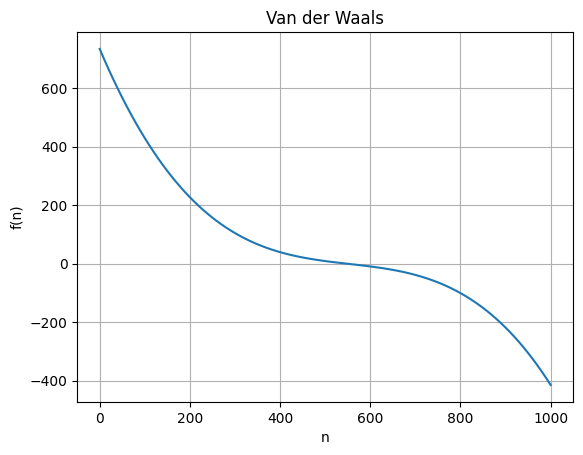

In [12]:
moles = np.linspace(0.0, 1000.0, 101)
fig, ax = plt.subplots()
ax.plot(moles, van_der_waals(moles))
ax.set_title("Van der Waals")
ax.set_xlabel("n")
ax.set_ylabel("f(n)")
ax.grid()
plot_VdW = fig, [ax]

You can then guess that the solution is around $n = 570$

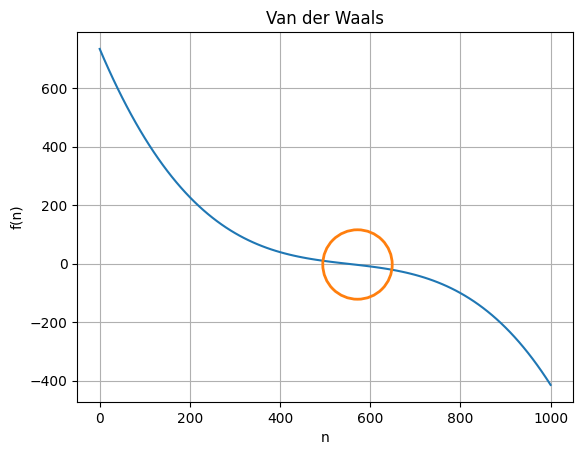

In [13]:
n_guess = 570
moles = np.linspace(0.0, 1000.0, 101)
fig, ax = plt.subplots()
ax.plot(moles, van_der_waals(moles))
ax.plot(n_guess, 0, 'o', markersize=50, markerfacecolor='none', markeredgewidth=2)
ax.set_title("Van der Waals")
ax.set_xlabel("n")
ax.set_ylabel("f(n)")
ax.grid()
plot_VdW = fig, [ax]

## Fixed-point method

In [26]:
def fixed_point_method(func: Callable, x_0: float, max_Iter: int, est_rel_Error: float):
    """A function performing fixed point method for solving non-linear equations.

    Args:
        func (Callable): A function giving the g(x) value of the non-linear equation that you want to solve.
        x_0 (float): First guess.
        max_Iter (int): Max number of iteration allowed
        est_rel_Error (float): The accepted estimated relative error, defined as abs(x_new-x_old)/abs(x_old)

    Returns:
        float: The root of the non-linear equation
    """
    # BEGIN SOLUTION
    iter = 0
    while iter < max_Iter:
        try:
            g = func(x_0)
        except: 
            print('Error: Overflow encountered. The method diverged.')
            break
        x_new = g
        est_rel_error_i = np.abs(x_new - x_0) / np.abs(x_0 + 1e-9)
        if est_rel_error_i <= est_rel_Error:
            print(f'Root found: {x_new}')
            return x_new
        else:
            x_0 = x_new
            iter += 1
    # END SOLUTION
    if iter == max_Iter: 
        print('Reached maximum number of iterations: the method does not converge')
    return x_new

In [27]:
def non_linear_func(x):
    return (x**2 - 1)/3

In [28]:
root = fixed_point_method(non_linear_func, x_0=0, max_Iter=1000, est_rel_Error=1e-6)

Root found: -0.3027756200363254


In [29]:
root = fixed_point_method(non_linear_func, x_0=10, max_Iter=1000, est_rel_Error=1e-6)

Error: Overflow encountered. The method diverged.


## Newton-Raphsod method

???